In [2]:
import pandas as pd
import matplotlib.pyplot as plot
col = list(pd.read_csv("data_2021.csv",nrows = 1).columns)
df = pd.read_csv("data_2021.csv", usecols=[ i for i in col if i != "index"])
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",Jan-50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [8]:
df.groupby("Founded")[:10].size().unstack()

TypeError: unhashable type: 'slice'

In [ ]:
len(df.columns)

41

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [ ]:
df['Avg Salary(K)'].max()

254.0

In [ ]:
df['Avg Salary(K)'].min()

15.5

In [ ]:
df["Founded"].max()

2019

In [ ]:
df["Founded"].min()

-1

In [ ]:
set(df["job_title_sim"])

{'Data scientist project manager',
 'analyst',
 'data analitics',
 'data engineer',
 'data modeler',
 'data scientist',
 'director',
 'machine learning engineer',
 'na',
 'other scientist'}

In [ ]:
count = 0
empty = 0
for i in df["Founded"]:
    if(i == -1):
        empty += 1
    count += 1
(1-empty/count)*100

93.26145552560648

In [ ]:
import re
salary_est = []
for est in df["Salary Estimate"]:
    est = est.split("-")
    rnge = [0,0]
    count = 0
    for i in est:
        num = re.findall("\d",i)
        n = ""
        for a in num:
            n += a
        rnge[count] = int(n)
        count += 1
    salary_est.append(rnge)

In [ ]:
df["Size"].value_counts()

1001 - 5000      150
501 - 1000       134
10000+           130
201 - 500        117
51 - 200          94
5001 - 10000      76
Jan-50            31
unknown           10
Name: Size, dtype: int64

In [ ]:
df["job_title_sim"].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [ ]:
df["Job Location"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job Location, dtype: int64

<AxesSubplot: xlabel='Age'>

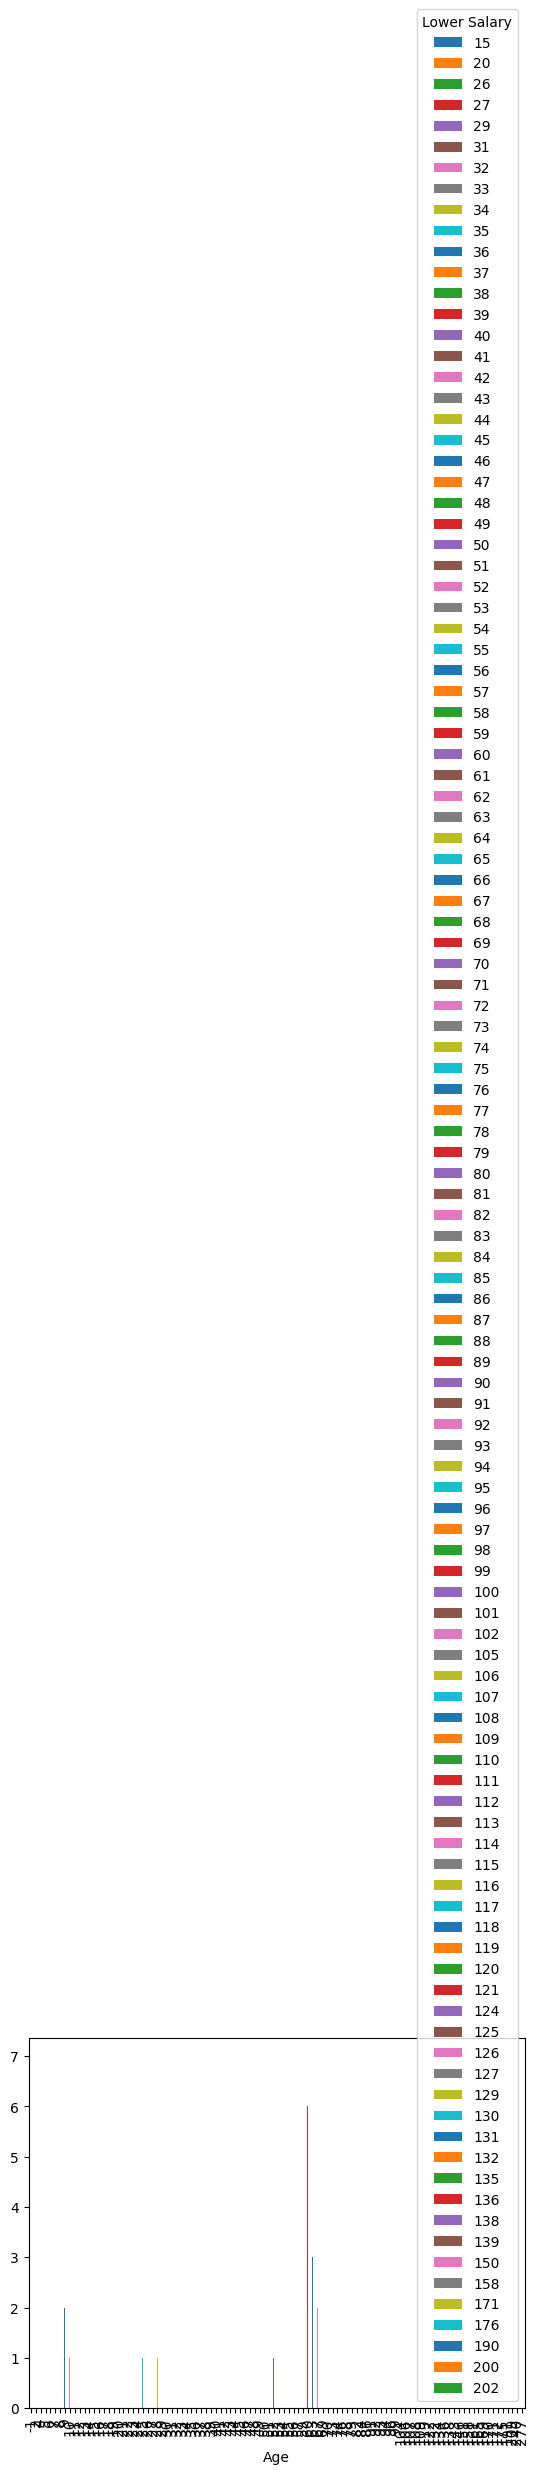

In [ ]:
df.groupby(["Age","Lower Salary"]).size().unstack().plot(kind="bar")